In [105]:
import sklearn.datasets
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

Linear regression for single feature,
$y = w_{0}x + b$

For multiple features,
$y = w_{0}x + w_{1}x + w_{2}x + w_{2}x + ... + b$

Representing this equation matrix form as,

$Y = X * transpose(W)$

In [106]:
california_housing = sklearn.datasets.fetch_california_housing(as_frame=True)
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [107]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [108]:
california_housing.target.tail(5)

20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, dtype: float64

In [109]:
X = california_housing.data.to_numpy()
X = (X - X.mean()) / X.std()

In [110]:
# scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# X = scaler.fit_transform(california_housing.data)

In [111]:
y = np.array(california_housing.target)

In [160]:
np.random.seed(47)

class MultivariateLinearRegression():

  def __init__(self, learning_rate=0.001, epochs=10000, cost_function="MSE"):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self._W = None
    self._b = None
    self._cost_history = []
    self._cost_function = cost_function

  def _initialize_parameters(self, shape):
    self._W = np.ones(shape)
    self._b = 0

  def predict(self, X):
    return np.dot(X, self._W) + self._b

  def _mean_squared_error(self, y, y_pred):
    return (np.sum(y - y_pred)**2)/(2*len(y))

  def _rmse(self, y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

  def _gradient_descent(self, X, y, y_pred):

    loss = y_pred - y

    # Derivative w.r.to weights
    weights_gradients = np.dot(X.T, loss) / len(X)

    # Derivative w.r.to bias
    bias_gradients = np.sum(loss) / len(X)

    # Update weights & bias parameters
    self._W -= self.learning_rate * weights_gradients
    self._b -= self.learning_rate * bias_gradients

  def fit(self, X, y):

    self._initialize_parameters(X.shape[1])

    for i in range(self.epochs):
      y_pred = self.predict(X)

      if self._cost_function == "MSE":
        cost = self._mean_squared_error(y, y_pred)
      else:
        cost = self._rmse(y, y_pred)
      self._cost_history.append(cost)

      self._gradient_descent(X, y, y_pred)

    return y_pred

In [113]:
def plot_cost(model):
  plt.title('Cost Function J')
  plt.xlabel('No. of iterations')
  plt.ylabel('Cost')
  plt.plot(model._cost_history)
  plt.show()

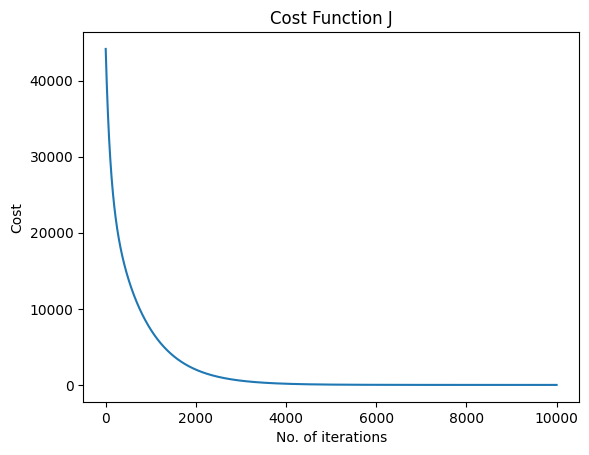

In [161]:
model = MultivariateLinearRegression()
y_pred = model.fit(X, y)
plot_cost(model)

In [147]:
model._W

array([-0.40047272,  0.55122979,  0.20313374, -0.19590879, -0.01197281,
        0.25054548,  0.20348966, -0.51895514])

In [148]:
print(y[-5:], y_pred[-5:])

[0.781 0.771 0.923 0.847 0.894] [2.07762315 2.08080651 2.06737626 2.07330015 2.05885056]


In [141]:
model._cost_history[:10], model._cost_history[-10:]

([44158.58751670419,
  39326.242492858415,
  35129.734676688,
  31478.78848729014,
  28296.562441046583,
  25517.58914919459,
  23086.037037656308,
  20954.24299873428,
  19081.4732525806,
  17432.87647842059],
 [0.03717324222085966,
  0.036864178999657854,
  0.036558380864024444,
  0.036255810437894574,
  0.03595643079553667,
  0.035660205455960804,
  0.035367098377417326,
  0.035077073951945544,
  0.03479009699998732,
  0.03450613276506981])

In [162]:
def r2_score(y_pred, y):
 sst = np.sum((y - y_pred.mean())**2)
 ssr = np.sum((y - y_pred)**2)
 r2 = 1-(ssr/sst)
 return r2

r2_score(y_pred, y)

0.003084586489237262

In [153]:
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression().fit(X, y)
y_pred_sklearn = sklearn_model.predict(X)

r2_score(y_pred_sklearn, y)

0.6062326851998051

In [142]:
sklearn_model.coef_

array([ 2.71480036e+02,  5.86595993e+00, -6.67191187e+01,  4.01019343e+02,
       -2.47201036e-03, -2.35398792e+00, -2.61919393e+02, -2.70125078e+02])